# Basic TensorFlow 2.0 Example 

#### by Sooyeon Won 
In this notebook I recreated the previous machine learning algorithm using TensorFlow 2.0.

### Keywords 
- TensorFlow 2.0
- Simple Linear Regression



### Contents 

<ul>
<li><a href="#libraries">1.  Import the relevant libraries</a></li>
<li><a href="#Generate">2.  Generate data</a></li>
<li><a href="#Solve">3.  Build a model with TensorFlow</a></li>
<li><a href="#Extract1">4.  Extract the weights and bias</a></li>
<li><a href="#Extract2">5.  Extract the outputs (make predictions)</a></li>
<li><a href="#Plot">6.  Plot the data</a></li>

</ul>



<a id='libraries'></a>
## 1. Import the relevant libraries

In [1]:
# Import the relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
print(tf.__version__)

2.3.0


<a id='Generate'></a>
## 2. Data generation

I generated data using the identical logic and code as the basic NN example from the [previous notebook](https://github.com/SooyeonWon/real_world_projects_collection_DS2020/blob/main/02_Basic_Neural_Network_SLR.ipynb). The only difference now is that we save it to an **npz file**. Npz is numpy's file type which allows you to save numpy arrays into a single .npz file. 

The concept of npz file is useful in machine learning cases, since the format of given datas is often csv, database, etc. Also, these formats are preprocessed into a desired format.

Thus, I saved it into  npz files to build algorithm using the npz files, not using the original file. So basically, I save the NumPy arrays into a file that I can later access. 

In [3]:
# Assign the size of training data
observations = 1000

# Generate 2 input variables: xs, zs
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

# Combine the 2 input vectors into one matrix (1000 x 2)
generated_inputs = np.column_stack((xs,zs))

# Generate a random noise 
noise = np.random.uniform(-1, 1, (observations,1))

# Produce the target according to the above defined noise. 
generated_targets = 2*xs - 3*zs + 5 + noise

# Save into an npz file called "TF_intro"
np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

>**Comments:** 
>- Firstly, I declared a variable ('observations'), which indicates the size of the training set that I want to generate. For this basic example, I generated 2 input variable, and named xs, xz. The variables are generated randomly and uniformly distributed. So, you can understand that the size of xs and zs is a vector of 1000(observations) x 1. 
>- Then I stacked the two dimensions (i.e. the input vectors) into one input matrix, using numpy method. 
>- Since I want to "make up" a function, use the ML methodology, and see if the algorithm has learned it, so I generate a small random noise to the function.
>        f(x,z) = 2x - 3z + 5 + noise.
>-Then I produced the "artifical" targets according to the f(x,z) definition. In this way, we can consider that the weights should be 2 and -3, while the bias is 5.
>- Finally, I save the NumPy array into an npz file called "TF_intro". 


<a id='Solve'></a>
## 3. Build a Model  with TensorFlow

<i/>Note: This intro is just the basics of TensorFlow which has way more capabilities and depth than that.<i>

In [4]:
# Load the training data from the NPZ
training_data = np.load('TF_intro.npz')

In [5]:
# Set the size of inputs and outputs 
# I set 2 input variables 
input_size = 2 

# I set 1 output variable.
output_size = 1 

> **Comments:** I declared the two variables where I assigned the input/output size of the model. It should be equal to the number of input/ output variables that I previously set. 

### 3.1. Build the model 

In [6]:
model = tf.keras.Sequential([                            
                            # List each layer in the model using "Dense" method
                            tf.keras.layers.Dense(output_size,
                                                 kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                 bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                 )
                            ])

> **Comments:** 
>- Note that I must build the model, to employ a Tensorflow. TF2 is based on Keras, so that is the module needed to build a model. 'Sequential' is the function that we lay down the model. 
>- In TF2, no calculations are involved, I just described the network. Each 'layer' is listed in the model. 
>- The method 'Dense' indicates, our mathematical operation to be (xw + b).
>- For this analysis, I include the basic arguments to create a solution that is as close as possible to the previous NumPy model. However there are many more extra arguments to customize your model.

### 3.2. Set the Optimization Algorithm: SGD

In [7]:
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

> **Comments:** 
>- We should also define a custom optimizer, where I can specify the learning rate. For this analysis, I set a stochastic gradient descent (SGD) as the optimizer.

### 3.3. Design the Objective Function: 'compile' method

In [8]:
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

> **Comments:** 
>- 'compile' is the place where I can select and indicate the optimizers and the loss. 
>- L2-norm loss : Least sum of squared error
>- Scaling by # of observations : mean


### 3.4. Fit the model 

In [9]:
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: 21.6009
Epoch 2/100
32/32 - 0s - loss: 1.3738
Epoch 3/100
32/32 - 0s - loss: 0.4047
Epoch 4/100
32/32 - 0s - loss: 0.3855
Epoch 5/100
32/32 - 0s - loss: 0.3533
Epoch 6/100
32/32 - 0s - loss: 0.3854
Epoch 7/100
32/32 - 0s - loss: 0.3627
Epoch 8/100
32/32 - 0s - loss: 0.3615
Epoch 9/100
32/32 - 0s - loss: 0.3686
Epoch 10/100
32/32 - 0s - loss: 0.3940
Epoch 11/100
32/32 - 0s - loss: 0.3594
Epoch 12/100
32/32 - 0s - loss: 0.3542
Epoch 13/100
32/32 - 0s - loss: 0.3983
Epoch 14/100
32/32 - 0s - loss: 0.3647
Epoch 15/100
32/32 - 0s - loss: 0.3439
Epoch 16/100
32/32 - 0s - loss: 0.3595
Epoch 17/100
32/32 - 0s - loss: 0.3524
Epoch 18/100
32/32 - 0s - loss: 0.3671
Epoch 19/100
32/32 - 0s - loss: 0.3430
Epoch 20/100
32/32 - 0s - loss: 0.3828
Epoch 21/100
32/32 - 0s - loss: 0.3607
Epoch 22/100
32/32 - 0s - loss: 0.3609
Epoch 23/100
32/32 - 0s - loss: 0.3523
Epoch 24/100
32/32 - 0s - loss: 0.3630
Epoch 25/100
32/32 - 0s - loss: 0.3559
Epoch 26/100
32/32 - 0s - loss: 0

>**Comments:** 
>- Finally, I fit the model, by specifying the inputs and targets. if they are not otherwise specified the number of epochs (= iterations over the full dataset) will be 1 (a single epoch of training), so the number of epochs is 'kind of' mandatory, too. 
>- I prefer verbose=2 (meaning, one line per epochs) to verbose =1 (meaning, progress bar), or verbose =0 (meaning, silent- no output about the training is displayed).

<a id='Extract1'></a>
## 4. Extract the weights and bias
Extracting the weight(s) and bias(es) of a model is not an essential step for the machine learning process. In fact, usually they would not tell much in a deep learning context. However, this simple example was set up to verify if the answers are correct.

In [10]:
model.layers[0].get_weights()

[array([[ 2.0166128],
        [-2.9801621]], dtype=float32),
 array([4.9958825], dtype=float32)]

In [11]:
# I saved the weights and biases in separate variables for easier examination
weights = model.layers[0].get_weights()[0]
bias = model.layers[0].get_weights()[1]

<a id='Extract2'></a>
## 5. Extract the outputs (make predictions)


In [12]:
predicted_target = model.predict_on_batch(training_data['inputs']).round(1)
actual_target = training_data['targets'].round(1)

> **Comments:** I predicted the target values in order to make use of the model. To make the values readable, I rounded the values. In practice, we predict the data using test dataset, which is not used for training. By displaying the actual targets (actual observed values), we can compare the outputs and the targets and evaluate how well the model works. 


<a id='Plot'></a>
## 6. Plotting the data

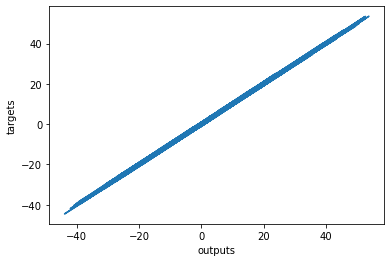

In [13]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

>**Comments:** The model is now optimized, so the outputs are calculated based on the last form of the model. I used 'np.squeeze' the arrays in order to fit them to what the plot function expects. Note that the visualisation is exactly the same as in the previous notebook. Since this analysis is the very basic Tensorflow, it does not show  the point of TensorFlow. 